In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
 data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# Selecting all columns except the last one, which is housing price.
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# Last column, equals housing price
target = raw_df.values[1::2, 2]

In [31]:
train_data = data[:-100, :];
train_target = target[:-100];
test_data = data[-100:, :];
test_target = target[-100:];

In [33]:
# 506 data points, 13 types of fields
train_data.shape

(406, 13)

In [41]:
train_mean = np.mean(train_data, axis = 0)
test_mean = np.mean(test_data, axis = 0)

In [42]:
train_mean

array([2.17604266e+00, 1.41625616e+01, 9.54467980e+00, 8.62068966e-02,
       5.32526355e-01, 6.32953202e+00, 6.45667488e+01, 4.16112094e+00,
       6.87438424e+00, 3.54453202e+02, 1.80369458e+01, 3.79859655e+02,
       1.14230542e+01])

In [43]:
train_std = np.std(train_data, axis = 0)
test_std = np.std(test_data, axis = 0)
train_std

array([7.27441931e+00, 2.52375059e+01, 6.53981894e+00, 2.80669321e-01,
       1.14630686e-01, 7.31003695e-01, 2.90184849e+01, 2.18130911e+00,
       6.59126785e+00, 1.32887547e+02, 2.21722201e+00, 4.04453794e+01,
       6.86843200e+00])

In [44]:
train_stand = (train_data - train_mean)/train_std

In [53]:
test_stand = (test_data - test_mean)/test_std

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1592\3363381420.py:1: RuntimeWarning: invalid value encountered in divide
  test_stand = (test_data - test_mean)/test_std


In [60]:
pd.DataFrame(train_stand).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.298267,0.152053,-1.106251,-0.307148,0.047750,0.335796,0.021822,-0.032605,-0.891237,-0.439870,-1.234403,0.421317,-0.938068
1,-0.295382,-0.561171,-0.378402,-0.307148,-0.554183,0.125127,0.493935,0.369493,-0.739521,-0.846228,-0.106866,0.421317,-0.332398
2,-0.295385,-0.561171,-0.378402,-0.307148,-0.554183,1.170265,-0.119467,0.369493,-0.739521,-0.846228,-0.106866,0.320688,-1.076382
3,-0.294686,-0.561171,-1.126129,-0.307148,-0.650143,0.914452,-0.646717,0.871531,-0.587806,-0.996731,0.299047,0.365192,-1.235079
4,-0.289644,-0.561171,-1.126129,-0.307148,-0.650143,1.118282,-0.357246,0.871531,-0.587806,-0.996731,0.299047,0.421317,-0.887110


C:\Users\lenovo\AppData\Local\Temp\ipykernel_1592\1093489371.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


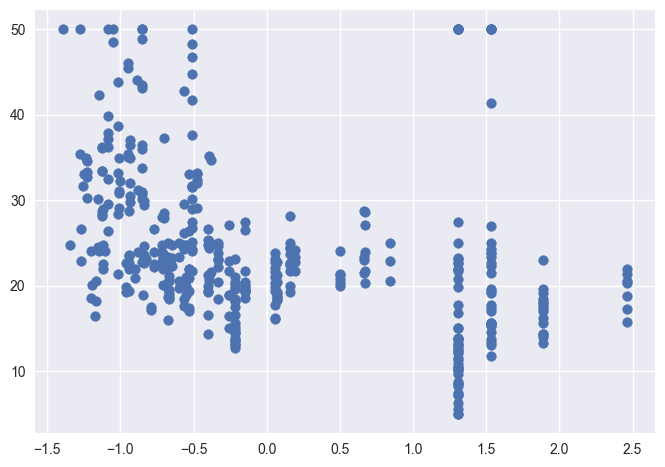

In [64]:
plt.style.use('seaborn')
# This shows that target doesn't vary linearly with most of the independent variables
plt.scatter(train_stand[:, 2], train_target)
plt.show()

In [80]:
X = train_stand;
Y = train_target;

In [81]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
X[:4, :]

array([[ 1.        , -0.29826747,  0.152053  , -1.10625078, -0.30714756,
         0.04775026,  0.33579581,  0.02182234, -0.0326047 , -0.89123737,
        -0.43986968, -1.23440314,  0.42131747, -0.9380677 ],
       [ 1.        , -0.29538202, -0.56117121, -0.37840188, -0.30714756,
        -0.5541828 ,  0.12512656,  0.4939352 ,  0.36949328, -0.73952149,
        -0.8462283 , -0.10686607,  0.42131747, -0.33239816],
       [ 1.        , -0.29538477, -0.56117121, -0.37840188, -0.30714756,
        -0.5541828 ,  1.17026492, -0.11946691,  0.36949328, -0.73952149,
        -0.8462283 , -0.10686607,  0.32068793, -1.07638165],
       [ 1.        , -0.29468643, -0.56117121, -1.12612901, -0.30714756,
        -0.65014315,  0.91445226, -0.64671704,  0.87153125, -0.58780561,
        -0.99673149,  0.29904727,  0.36519239, -1.23507872]])

In [89]:
# This is for 1 data point.
# When the data point would change, the x column vector would also change.
# Both theta and x would be column vectors. 
def hypothesis(x, thetas):
    y = 0
    n = x.shape[0]

    for i in range(n):
        y += thetas[i]*x[i]

    return y

In [90]:
# X is the full 2d array.
# Will iterate through the array, it has data points arranged in rows.
# In each row, there would be values for all fields.
# Will pick one row(data point), and current thetas at a time.
# Will loop through all data points and corresponding target points.
# Will add all errors and return the average
def cost(X, Y, thetas):
    m = X.shape[0]
    total_error = 0

    for i in range(m):
        y_p = hypothesis(X[i], thetas)

        total_error += (y_p - Y[i])**2

    return total_error/m

In [91]:
# We loop through all data points row wise
# For 1 theta Q, the partial derivative equals:-
# Difference of {Sum over all data points[(predicted - true) * Coefficient]}
# This is exactly what is done below.
# In one go, we calculate gradients for all thetas.
# And we divide them by #of data points, to prevent values from becoming too large.
# This 1/m is at the place where 1/2 appears in the expression.

# Note:- This will be run after every updation of the set of thetas.
# Instead of updating theta one by one and using it in th next theta's calculation,
# here, the all thetas are calculated at once, and then updated.
# As seen previously, it makes no difference.
def gradient(X, Y, theta):
#     m  = #data points, n = #Fields
    m, n = X.shape
    
#     Because n is also = #thetas ( = # fields with 1  already added)
    grad = np.zeros((n,))

    for j in range(n):
        for i in range(m):

            x = X[i]

            y_p = hypothesis(x, theta)

            y_t = Y[i]

            grad[j] += (y_p - y_t)*x[j]

    return grad/m

In [92]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 3000):
    
    m, n = X.shape
    theta = np.zeros((n, ))
    cost_epoch = []

    for i in range(max_steps):

#         Gradient vector for all thetas
        grad = gradient(X, Y, theta)
        
        e = cost(X, Y, theta)
        cost_epoch.append(e)

        for j in range(n):
#           Updating all thetas at once, using their gradient.
#           An alternate way is find gradient of 1 theta, find its value, use that value to find gradient of another theta
#           and so on. It makes no difference in practice. This code is much simpler to write.
            theta[j] = theta[j] - learning_rate*grad[j]

    return theta, cost_epoch

In [93]:
theta, cost_epoch = gradient_descent(X, Y, learning_rate=0.1, max_steps = 200)

In [94]:
theta

array([24.08990146, -1.34925841,  1.0560573 ,  0.1985714 ,  0.56059603,
       -1.60951376,  3.51457791,  0.03520847, -2.821495  ,  2.6315173 ,
       -1.68660888, -1.75918785, -0.05668996, -3.63949559])

In [95]:
cost_epoch[-10:]


[22.72117673030725,
 22.72043777546791,
 22.719713283613206,
 22.719002957246214,
 22.718306505451913,
 22.71762364373716,
 22.716954093874985,
 22.716297583753096,
 22.715653847226346,
 22.71502262397335]

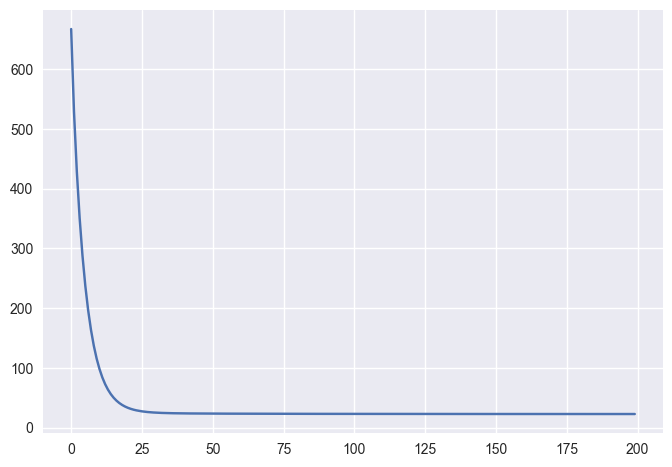

In [96]:
plt.plot(cost_epoch)
plt.show()

In [102]:
# Testing the results

In [107]:
Xtest = test_stand
Ytest = test_target
ones = np.ones((Xtest.shape[0], 1))
Xtest = np.hstack((ones, Xtest))
print(Xtest[:4, :4], Xtest.shape)

[[ 1.          1.0445471          nan  0.14438313]
 [ 1.          0.23191172         nan  0.14438313]
 [ 1.         -0.18967203         nan  0.14438313]
 [ 1.          0.46250654         nan  0.14438313]] (100, 14)


In [108]:
y_pred_test = []

for i in range(Xtest.shape[0]):
    pred = hypothesis(Xtest[i], theta)
    y_pred_test.append(pred)

y_pred_test = np.array(y_pred_test)

In [110]:
for i in range(len(y_pred_test)):
    print(y_pred_test[i], Ytest[i])
     

nan 11.9
nan 27.9
nan 17.2
nan 27.5
nan 15.0
nan 17.2
nan 17.9
nan 16.3
nan 7.0
nan 7.2
nan 7.5
nan 10.4
nan 8.8
nan 8.4
nan 16.7
nan 14.2
nan 20.8
nan 13.4
nan 11.7
nan 8.3
nan 10.2
nan 10.9
nan 11.0
nan 9.5
nan 14.5
nan 14.1
nan 16.1
nan 14.3
nan 11.7
nan 13.4
nan 9.6
nan 8.7
nan 8.4
nan 12.8
nan 10.5
nan 17.1
nan 18.4
nan 15.4
nan 10.8
nan 11.8
nan 14.9
nan 12.6
nan 14.1
nan 13.0
nan 13.4
nan 15.2
nan 16.1
nan 17.8
nan 14.9
nan 14.1
nan 12.7
nan 13.5
nan 14.9
nan 20.0
nan 16.4
nan 17.7
nan 19.5
nan 20.2
nan 21.4
nan 19.9
nan 19.0
nan 19.1
nan 19.1
nan 20.1
nan 19.9
nan 19.6
nan 23.2
nan 29.8
nan 13.8
nan 13.3
nan 16.7
nan 12.0
nan 14.6
nan 21.4
nan 23.0
nan 23.7
nan 25.0
nan 21.8
nan 20.6
nan 21.2
nan 19.1
nan 20.6
nan 15.2
nan 7.0
nan 8.1
nan 13.6
nan 20.1
nan 21.8
nan 24.5
nan 23.1
nan 19.7
nan 18.3
nan 21.2
nan 17.5
nan 16.8
nan 22.4
nan 20.6
nan 23.9
nan 22.0
nan 11.9


In [ ]:
# Run after removing nan
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Ytest, y_pred_test))
print('MSE:', metrics.mean_squared_error(Ytest, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, y_pred_test)))

In [97]:
# Replacing the above loops with np functions (dot, etc)

In [98]:
def hypothesis(x, theta):
    return np.dot(x, theta)
     

In [99]:
def cost(X, Y, theta):
    m = X.shape[0]
    total_error = 0

    y_p = hypothesis(X, theta)
    total_error = np.sum((y_p - Y)**2)

    return total_error/m

In [100]:
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)

    grad = np.dot(X.T, (y_p - Y))

    return grad/X.shape[0]


In [101]:

def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 1000):

    m, n = X.shape
    theta = np.zeros((n, ))
    cost_epoch = []

    for i in range(max_steps):

        grad = gradient(X, Y, theta)

        e = cost(X, Y, theta)
        cost_epoch.append(e)

        theta = theta - learning_rate*grad

    return theta, cost_epoch